# Polynomial regression

**Info**
If you're short on time leave this exercise for later and prioritize the next exercises.



In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In this exercise, suppose you want to buy a house in the City of Windsor, Canada. You contact a real-estate salesperson to get information about current house prices and receive details on 546 properties sold in Windsor in the last two years. You would like to figure out what the expected cost of a house might be given only the lot size of the house you want to buy. The dataset has an independent variable, `lotsize`
, specifying the lot size of a property and a dependent variable, `price`
, the sale price of a house. Assume an $N$th-order polynomial relation between `price`
 and `lot-size`
.
The goal is to estimate the best model (in a least-square-sense) that predicts the house price based from lot size.
You will implement a method to estimate the model parameters of  $N$-th order polynomials and use the model to predict the price of a house (in Canadian dollars) based on its lot size (in square feet).
A polynomial _model_ of order $N$ is defined by:

$$
f_\mathbf{w}(x) = \mathbf{w}_0 + \mathbf{w}_1 x + \mathbf{w}_2 x^2 + \dots + \mathbf{w}_N x^N,
$$
in which, the coefficients $\mathbf{w}_i$ are the model parameters and $x$ is the `lot_size`
. 
**Note:** Note that $f_\mathbf{w}$ is linear in the model parameters, $\mathbf{w}$. Solving for the model parameters can be done by setting up the linear set of equations $A \mathbf{w} = y$.

Where

$$
\underbrace{\begin{bmatrix}
    1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^N \\
    1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^N \\
    1 & x_3 & x_3^2 & x_3^3 & \dots & x_3^N \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_m & x_m^2 & x_m^3 & \dots & x_m^N
\end{bmatrix}}_A
\times
\underbrace{\begin{bmatrix}
    \mathbf{w}_0 \\
    \mathbf{w}_1 \\
    \mathbf{w}_2 \\
    \mathbf{w}_3 \\
    \vdots \\
    \mathbf{w}_N
\end{bmatrix}}_\mathbf{w}
=
\underbrace{\begin{bmatrix}
    y_1 \\
    y_2 \\
    y_3 \\
    \vdots \\
    y_m
\end{bmatrix}}_y.
$$
Define the _loss_ $\mathcal{L}$ for a single prediction as the squared error

$$
\mathcal{L}(\hat{y}_i, y_i) = (\hat{y}_i-y_{i})^2,
$$
where $\hat{y}_i=f_{\mathbf{w}}(x_i)$ is the prediction and $y_i$ is the label.
The linear least squares method minimizes the sum of squares. In other words, the parameters $\mathbf{w}$ can be learned by solving the following optimisation problem:

$$
\mathbf{w} = \underset{\mathbf{w}}{\operatorname{argmin}} \frac{1}{m}\sum_{i=1}^{m} \mathcal{L}(\hat{y}_i, y_i) \quad\quad \text{(1)}
$$
**Note:** Recall projecting the vector of labels $\mathbb{y} = \begin{bmatrix} y_1\\y_2\\\vdots\\y_n \end{bmatrix}$ onto the column space of the design matrix defined by $A$ is equivalent to minimizing the mean squared error in Equation 1.

## Data exploration
The following cell loads the dataset and visualizes the data:


Text(0, 0.5, 'House price')

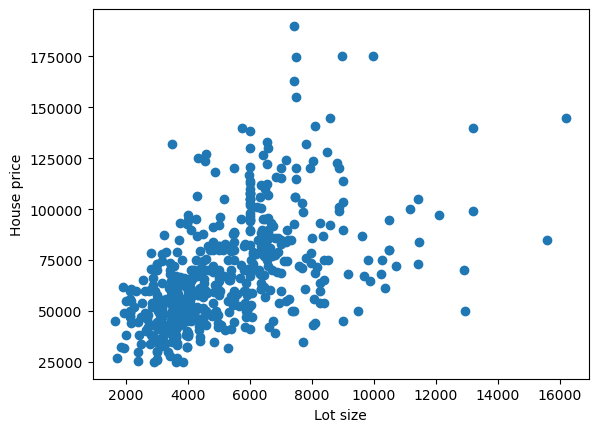

In [2]:
filename = "./data/simple_windsor.csv"
names = ["lotsize", "price"]
dataset = np.loadtxt(filename, delimiter=',').astype(np.int64)

X_full, y_full = dataset.T

plt.scatter(X_full, y_full)
plt.xlabel('Lot size')
plt.ylabel('House price')


---
**Task 1 (easy): Questions💡**
1. In the cell below list and characterize 5 observations about the data.


---

In [0]:
## List reasons here
"""
1)
Looks like there is a preference for round numbers e.g. looking at 6k square feet 

2)
Most of the data is between 2k and 7k square feet

3)
The data is very skattered around the graph

4)
There are outlier points that have much higher price or lower price for the same square feet area

5)
The most expensive house is not the biggest house

"""

### Splitting into train and test data
The following cell splits the dataset into $80\%$ training data and $20\%$ test data using the scikit-learn library
:


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

## Polynomial regression
The following exercise guides you through the steps (1-4) for learning the polynomial model.
1. Define the model, e.g. line or polynomial.
2. Identitfy knowns and uknowns.
3. Identify the kernel.
4. Construct the design matrix $A$ for the dataset (see the `get_design_matrix`
 function below).
5. Estimate the model parameters using linear least squares ( [Task 2](#estimate) ).

The function `get_design_matrix`
 (defined in the cell below) creates a design matrix for a polynomial of order $N$.


In [40]:
def get_design_matrix(x, order=1):
    """
    Get the coefficients of polynomial in a least square sense of order N.
    
    :param x: Must be numpy array of size (N).
    :order n: Order of Polynomial.
    """
    
    if order < 1 or x.ndim != 1:
        return x

    count = x.shape[0]
    matrix = np.ones((count, order + 1), np.float64)

    for i in range(1, order+1):
        matrix[:, i] = x**i

    return matrix


---
**Task 2 (medium): Estimate model parameters👩‍💻**
Implement the function `train(X, y, order)`
 in the cell below to learn the model parameters. Use `get_design_matrix(X, order)`
 to create the design matrix.

---

In [41]:
def train(X, y, order):
    """
    :param X: Input vector.
    :param y: Training data values.
    :param order: Order of the model to estimate.
    
    :return: Parameters of model.
    """
    design = get_design_matrix(X, order)
    model = np.linalg.lstsq(design, y)
    return model[0]


---
**Task 3 (easy): Define prediction model👩‍💻**
Use the learned model parameters to predict house prices given an input vector $X$ of lot sizes. Implement the prediction function `predict(X, params)`
 in the cell below. 

---

In [42]:
def predict(X, w):
    """
    :param X: Input vector.
    :param w: Estimated parameters.
    
    :return: Predicted y-values.
    """

    return X@w


---
**Task 4 (easy): Prediction👩‍💻**
In this task you will use the learnt model parameters for making predictions of house prices given lot sizes. Implement the following steps (marked by `#`
) in the code cell below.
1. Learn model parameters using `X_train`
 and `y_train`
. 
2. In the cell below calculate the predicted house prices (`y`
-values) given the lot-sizes defined in the `values`
 variable.
3. Plot the predicted house prices as a line-plot.


---

Order: 1


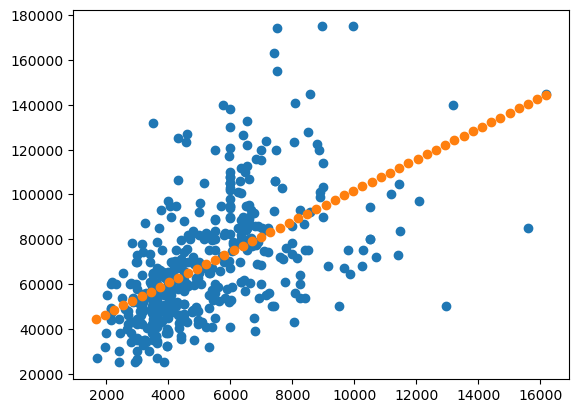

Order: 3


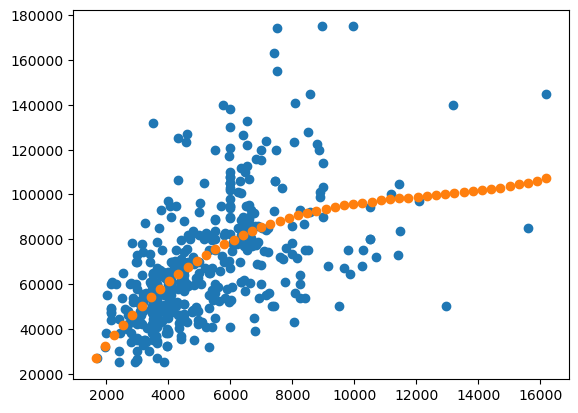

Order: 4


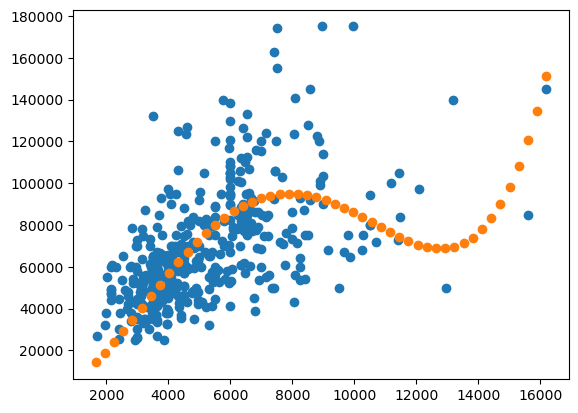

Order: 7


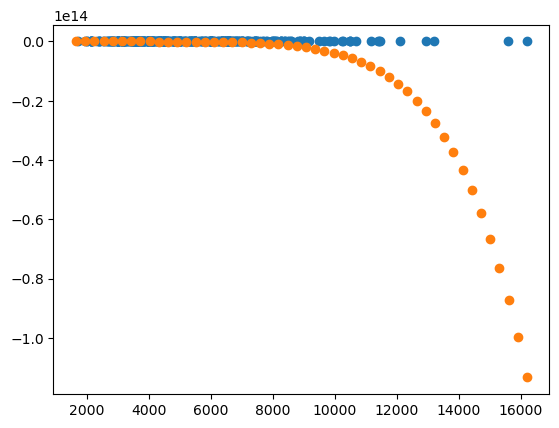

Order: 11


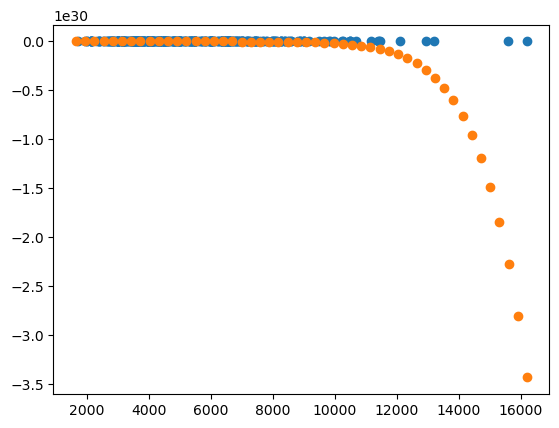

In [43]:
values = np.linspace(X_full.min(), X_full.max(), 50)

# (1) Learn model parameters
orders = [1, 3, 4, 7, 11]

for order in orders:
    print("Order:", order)
    model = train(X_train, y_train, order)

    # (2) Evaluate model

    predictions = predict(get_design_matrix(values, order), model)
    # print(predictions)

    # (3) Plot predicted values
    plt.scatter(X_train, y_train)
    plt.scatter(values, predictions)
    plt.show()


---
**Task 5 (medium): Order of Polynomial👩‍💻**
In this task you will experiment with the order of the polynomial model to investigate performance.
1. Increase the order of the polynomial, identify the kernel and evaluate the results for:    1. A $3$rd-order polynomial.
    2. A $4$th-order polynomial.
    3. A $7$th-order polynomial.
    4. An $11$th-order polynomial.



Observe that the predictions deviate drastically from the actual lot sizes for the $7$th-order polynomial and above. 
1. Explain why this happens? 


---

Kernel for n-th order polynomial:
$$
\varphi_n(x) = 
\begin{bmatrix}
x^n \\
x^{n-1} \\
\vdots \\
x^0
\end{bmatrix}
$$

For 7th and 11th order we end up in place where the predicted values get so far from the real ones that the model is useless (over-fitting).
3rd and 4th look better but 3rd looks like it does the best job out of the 4 versions

The model is overfitting to the training data


This problem can be solved by normalizing the input vectors. Normalization transforms the input values to the interval $[0, 1]$ by scaling and translating the inputs using the minimum and maximum values.
The cell below provides functions for normalizing and denormalizing (the inverse transformation) input vectors:


In [46]:
def normalized(X):
    n = (X - np.min(X_full))/np.max(X_full)
    return n

def denormalized(X):
    return X*np.max(X_full) + np.min(X_full)


---
**Task 6 (medium):  Higher order polynomials with normalization👩‍💻**
In this task you will redo [Task 4](#learn) using normalization. Write your solution in the cell below.
1. Normalize the inputs in the variable `X_{train}`
 using the function`normalized`
. 
2. Re-train the model parameters using the normalized inputs using $3$rd, $4$th, and $7$th order polynomials as in [Task 4](#learn).
3. Predict the values of (normalized) `X_{test}`
.
4. Plot the predicted result as a curve using `plt.plot`



---

Order: 1


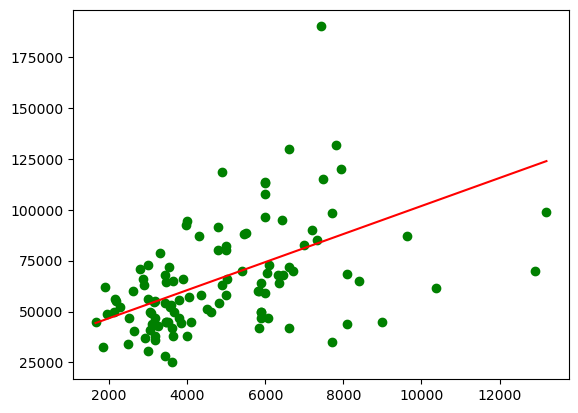

Order: 3


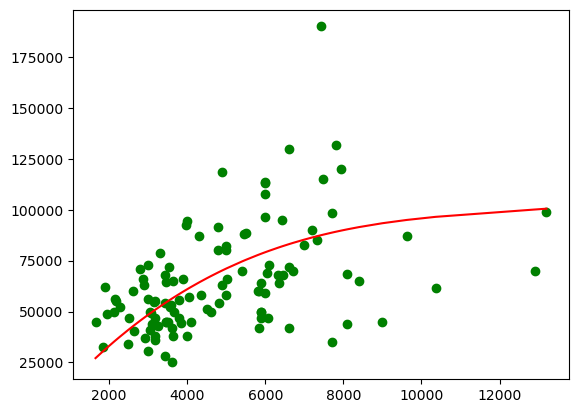

Order: 4


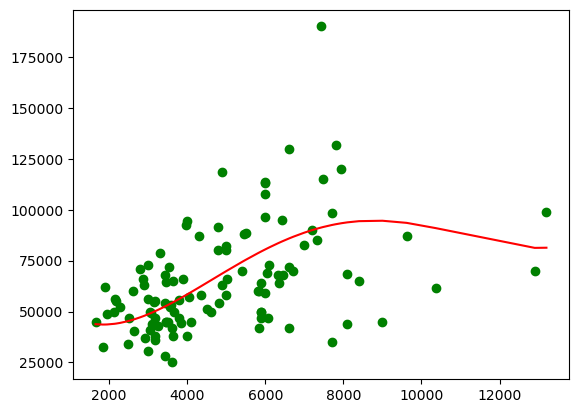

Order: 7


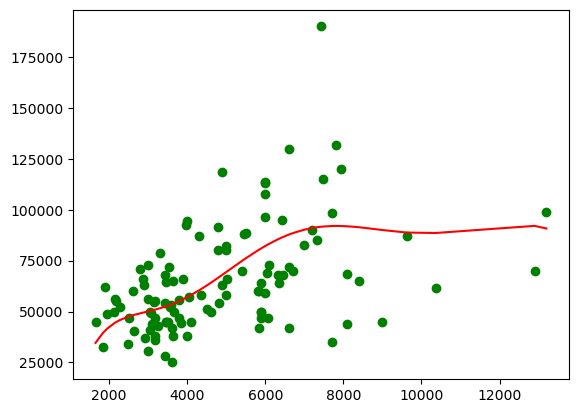

In [51]:
# (1) Normalize the inputs
X_normalized = normalized(X_train)

# (2) Learn parameters and predict y-values
orders = [1,3,4,7]
for order in orders:
    print("Order:", order)
    model = train(X_normalized, y_train, order)
    y_predicted = predict(get_design_matrix(normalized(X_test), order), model)

    # Sort X_test and corresponding y_predicted for a smooth plot
    sorted_indices = np.argsort(X_test)
    X_test_sorted = X_test[sorted_indices]
    y_predicted_sorted = y_predicted[sorted_indices]

    # (3) Plot predicted values
    plt.scatter(X_test, y_test, c="g")
    plt.plot(X_test_sorted, y_predicted_sorted, "r")  # Sorted for a clean plot
    plt.show()


---
**Task 7 (medium): Normalization improvement💡**
1. Visually inspect and reason about how normalization impacts the results.
2. Explain why normalization achieves a better performance.


---

In [0]:
# Write your answer here
"""
1)
When normalizing we are able to use higher order polynomials without them going crazy 

2)
Since the values we are working with are smaller, then it allows the model to have less drastic changes 

"""


## Evaluation
In the following steps you will evaluate the models using the _root mean squarred error_ (RMSE) on unseen data (test data). 
The _root mean squared error_ is defined as:

$$
 \sqrt{\frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2}
$$

and calculates the average error measured in the same units as the house prices. 
The code cell below provides an implementation of the RMSE:


In [57]:
def rmse(X, y, w, order=1):
    X = normalized(X)
    ym = predict(get_design_matrix(X, order), w)
    return np.sqrt(np.mean((y-ym)**2))


---
**Task 8 (easy): Model evaluation👩‍💻**
In this task you will implement the function `evaluate_models`
 to evaluate polynomial models of order 1 to 19 using the _root mean squared error_. 
For each model order:
1. Learn the model parameters using the `train`
 function.
2. Calculate the _root mean squared error_ of the model on the training set.
3. Calculate the _root mean squared error_ of the model on the test set.


---

In [67]:
def evaluate_models():
    """Calculates the RMS error for both training and test data for models with polynomial orders
    from 1 to 19.
    
    Returns: (train losses, test losses)
    """
    losses_train = []
    losses_test = []
    for order in range(1, 19):
        # Add code here
        X_normalized = normalized(X_train)
        model = train(X_normalized, y_train, order)
        # first, estimate parameters
        rmse_train = rmse(X_train, y_train, model, order)
        rmse_test = rmse(X_test, y_test, model, order)

        losses_train.append(rmse_train)
        losses_test.append(rmse_test)
    return losses_train, losses_test


---
**Task 9 (easy): Plotting results👩‍💻**
1. Plot the training and test losses in the cell below. 
2. Explain why the test and training losses behave differently as the order of the polynomial increases.
3. Use RMSE and the plot(s) to argue what could be the consequences of using these models given that they have these properties. 


---

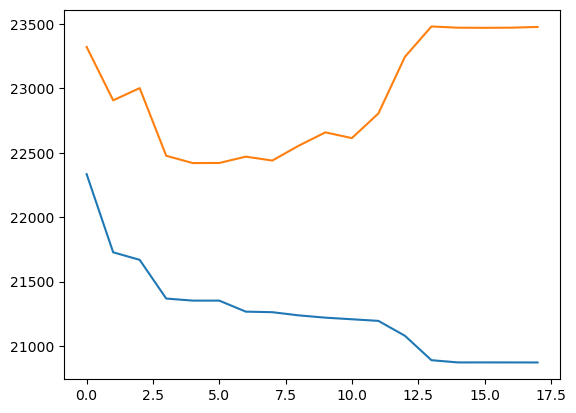

In [68]:
# Write your solution here
losses_train, losses_test = evaluate_models()
plt.plot(losses_train)
plt.plot(losses_test)

Once the order of the polynomial gets to a certain size then the model starts performing worse on the testing data even tho it performs better on the training data. This is because of over-fitting.  

If you have a under-fitted or over-fitted model then the predicted results will be bad


---
**Task 10 (medium): Reflection💡**
1. Reflect on whether it's possible and reasonable to chose a higher order polynomial for improving the training loss. Use the plot in your argumentation. 


---

In [69]:
# Write your answers here
"""
You should only increase the polynomial order if it lowers the rmse on testing data. Otherwise you are moving into over-fitting. 
Increasing the order will almost always decrease the rmse on the training data. But that don't help yea, fool 
"""

"\nYou should only increase the polynomial order if it lowers the rmse on testing data. Otherwise you are moving into over-fitting. \nIncreasing the order will almost always decrease the rmse on the training data. But that don't help yea, fool \n"